## Importing necessary packages

In [2]:
# import the necessary libraries
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
# %config InlineBackend.figure_format ='retina'

%matplotlib inline

## Loading dataset and cleaning the data

In [5]:
data=pd.read_csv("data.csv")

In [3]:
#check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marketplace       637 non-null    object 
 1   review_date       637 non-null    object 
 2   customer_id       637 non-null    int64  
 3   review_id         637 non-null    object 
 4   product_id        637 non-null    object 
 5   product_parent    637 non-null    int64  
 6   product_title     637 non-null    object 
 7   product_category  637 non-null    object 
 8   total_rating      637 non-null    int64  
 9   product_rating    637 non-null    int64  
 10  shipment_rating   24 non-null     float64
 11  seller_rating     15 non-null     float64
 12  helpful_votes     637 non-null    int64  
 13  total_votes       637 non-null    int64  
 14  review_headline   637 non-null    object 
 15  review_body       637 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory us

In [4]:
#check for the missing data
print(np.sum(data.marketplace.isnull()))
print(np.sum(data.review_date.isnull()))
print(np.sum(data.customer_id.isnull()))
print(np.sum(data.review_id.isnull()))
print(np.sum(data.product_id.isnull()))
print(np.sum(data.product_parent.isnull()))
print(np.sum(data.product_title.isnull()))
print(np.sum(data.product_category.isnull()))
print(np.sum(data.total_rating.isnull()))
print(np.sum(data.product_rating.isnull()))
print(np.sum(data.shipment_rating.isnull()))
print(np.sum(data.seller_rating.isnull()))
print(np.sum(data.helpful_votes.isnull()))
print(np.sum(data.total_votes.isnull()))
print(np.sum(data.review_headline.isnull()))
print(np.sum(data.review_body.isnull()))
# the missing data is due to the reviews about shipping and seller are not presnet

0
0
0
0
0
0
0
0
0
0
613
622
0
0
0
0


In [6]:
#replace the data with zero
data.replace(np.nan,0,inplace = True)

In [6]:
data.head()

,marketplace,review_date,customer_id,review_id,product_id,product_parent,product_title,product_category,total_rating,product_rating,shipment_rating,seller_rating,helpful_votes,total_votes,review_headline,review_body
0,US,31-08-2015,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,2,0.0,0.0,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps an...
1,US,31-08-2015,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,4,0.0,0.0,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ..."
2,US,31-08-2015,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,5,0.0,0.0,0,0,Five Stars,Fits iPhone 6 well
3,US,31-08-2015,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,5,0.0,0.0,0,0,Great charger,Great charger. I easily get 3+ charges on a Sa...
4,US,31-08-2015,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,5,0.0,0.0,0,0,Five Stars,Great for the price :-)


In [7]:
print(np.sum(data.marketplace.isnull()))
print(np.sum(data.review_date.isnull()))
print(np.sum(data.customer_id.isnull()))
print(np.sum(data.review_id.isnull()))
print(np.sum(data.product_id.isnull()))
print(np.sum(data.product_parent.isnull()))
print(np.sum(data.product_title.isnull()))
print(np.sum(data.product_category.isnull()))
print(np.sum(data.total_rating.isnull()))
print(np.sum(data.product_rating.isnull()))
print(np.sum(data.shipment_rating.isnull()))
print(np.sum(data.seller_rating.isnull()))
print(np.sum(data.helpful_votes.isnull()))
print(np.sum(data.total_votes.isnull()))
print(np.sum(data.review_headline.isnull()))
print(np.sum(data.review_body.isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
# Remove special characters and numbers
data['review'] = data['review_body'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

#Lower cased reviews
data['review'] = data['review'].apply(lambda x: x.lower())

In [9]:
data.head()

,marketplace,review_date,customer_id,review_id,product_id,product_parent,product_title,product_category,total_rating,product_rating,shipment_rating,seller_rating,helpful_votes,total_votes,review_headline,review_body,review
0,US,31-08-2015,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,2,0.0,0.0,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps an...,issues once i turned on the circle apps an...
1,US,31-08-2015,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,4,0.0,0.0,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ...",i m embarrassed to admit that until recently ...
2,US,31-08-2015,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,5,0.0,0.0,0,0,Five Stars,Fits iPhone 6 well,fits iphone well
3,US,31-08-2015,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,5,0.0,0.0,0,0,Great charger,Great charger. I easily get 3+ charges on a Sa...,great charger i easily get charges on a sa...
4,US,31-08-2015,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,5,0.0,0.0,0,0,Five Stars,Great for the price :-),great for the price


In [10]:
num_reviews = len(data)
num_words = data['review'].apply(lambda x: len(x.split())).sum()
num_unique_words = len(set(' '.join(data['review']).split()))

print("Number of reviews:", num_reviews)
print("Number of words:", num_words)
print("Number of unique words:", num_unique_words)

Number of reviews: 637
Number of words: 22496
Number of unique words: 3047


In [12]:
from collections import Counter

word_freq = Counter(' '.join(data['review']).split())
top_words = word_freq.most_common(20)
for word, freq in top_words:
    print(word, ":", freq)

the : 1130
i : 729
and : 604
to : 566
a : 545
it : 530
is : 339
of : 328
for : 271
this : 268
in : 233
you : 233
my : 231
but : 215
they : 208
that : 207
on : 201
are : 182
not : 181
with : 178


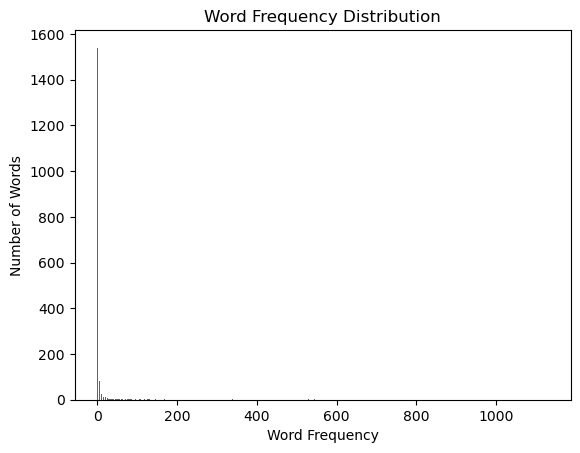

In [13]:
# Plot word frequency distribution
freq_dist = Counter(word_freq.values())
# print(freq_dist.keys(), freq_dist.values())
plt.bar(freq_dist.keys(), freq_dist.values())
plt.title("Word Frequency Distribution")
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.show()

In [14]:
#checking the co-relation between differnt columns
data.corr()

,customer_id,product_parent,total_rating,product_rating,shipment_rating,seller_rating,helpful_votes,total_votes
customer_id,1.000000,0.026988,0.060042,0.060042,-0.080097,0.001967,0.030152,0.009146
product_parent,0.026988,1.000000,-0.019948,-0.019948,-0.035650,-0.081295,-0.006713,-0.009633
total_rating,0.060042,-0.019948,1.000000,1.000000,0.034097,0.006345,-0.106574,-0.133787
product_rating,0.060042,-0.019948,1.000000,1.000000,0.034097,0.006345,-0.106574,-0.133787
shipment_rating,-0.080097,-0.035650,0.034097,0.034097,1.000000,0.182321,0.000670,0.007687
seller_rating,0.001967,-0.081295,0.006345,0.006345,0.182321,1.000000,0.092700,0.103702
helpful_votes,0.030152,-0.006713,-0.106574,-0.106574,0.000670,0.092700,1.000000,0.975719
total_votes,0.009146,-0.009633,-0.133787,-0.133787,0.007687,0.103702,0.975719,1.000000


array([[<AxesSubplot: title={'center': 'customer_id'}>,
        <AxesSubplot: title={'center': 'product_parent'}>,
        <AxesSubplot: title={'center': 'total_rating'}>],
       [<AxesSubplot: title={'center': 'product_rating'}>,
        <AxesSubplot: title={'center': 'shipment_rating'}>,
        <AxesSubplot: title={'center': 'seller_rating'}>],
       [<AxesSubplot: title={'center': 'helpful_votes'}>,
        <AxesSubplot: title={'center': 'total_votes'}>, <AxesSubplot: >]],
      dtype=object)

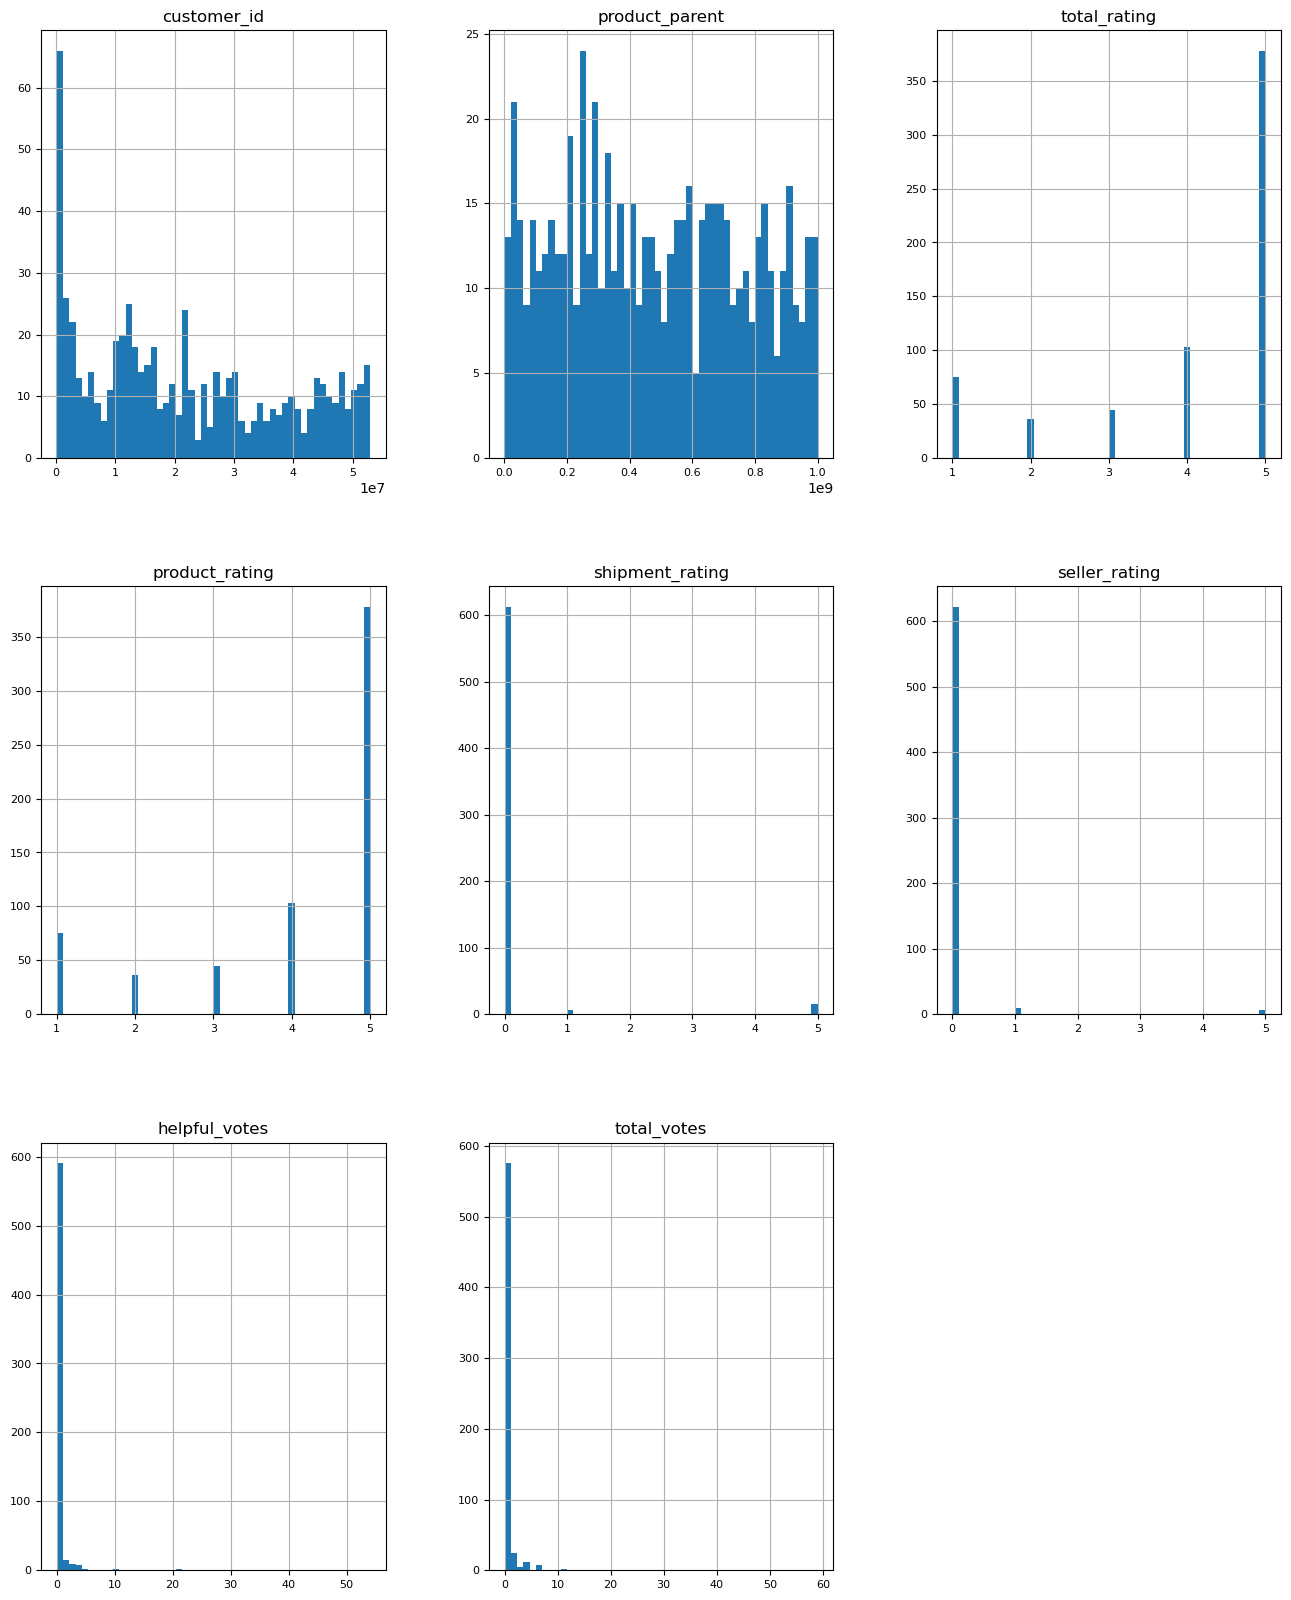

In [15]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Text(0, 0.5, 'Reviewer ID')

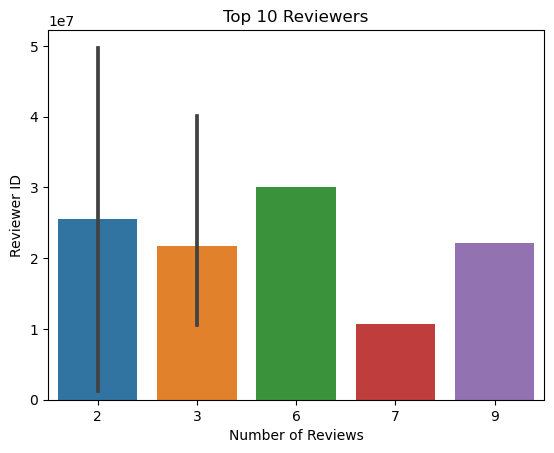

In [16]:
top_reviewers = data['customer_id'].value_counts().head(10)

sns.barplot(x=top_reviewers.values, y=top_reviewers.index)
plt.title('Top 10 Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer ID')


Review length summary statistics:
Mean: 34.92150706436421 words
Median: 14.0 words
Minimum: 1 words
Maximum: 1203 words
Standard deviation: 89.48962621578501 words


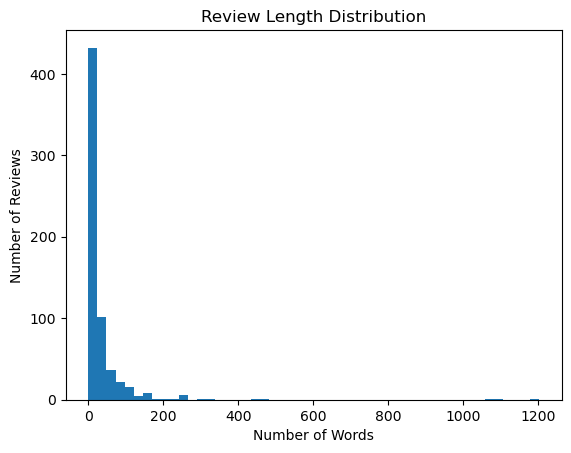

In [17]:
review_lengths = data['review_body'].apply(lambda x: len(x.split()))

mean_length = review_lengths.mean()
median_length = review_lengths.median()
min_length = review_lengths.min()
max_length = review_lengths.max()
std_length = review_lengths.std()

print("\nReview length summary statistics:")
print("Mean:", mean_length, "words")
print("Median:", median_length, "words")
print("Minimum:", min_length, "words")
print("Maximum:", max_length, "words")
print("Standard deviation:", std_length, "words")

# Plot review length distribution
plt.hist(review_lengths, bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

In [9]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

In [10]:
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    tokens = [porter.stem(token) for token in tokens]
    return tokens

data['reviewTokens'] = data['review_body'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/dmitry/nltk_data'
    - '/Users/dmitry/.conda/envs/adspc1/nltk_data'
    - '/Users/dmitry/.conda/envs/adspc1/share/nltk_data'
    - '/Users/dmitry/.conda/envs/adspc1/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [11]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [12]:
all_tokens = [token for review in data['reviewTokens'] for token in review]
word_counts = Counter(all_tokens)

wordcloud = WordCloud().generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

KeyError: 'reviewTokens'

In [23]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dmitry/nltk_data...


<Axes: ylabel='Density'>

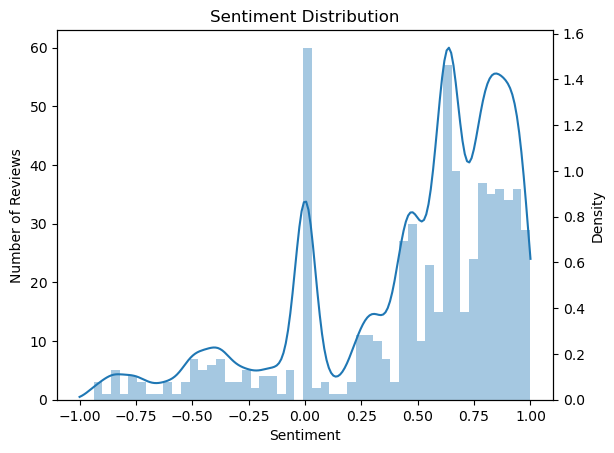

In [75]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores = data['review_body'].apply(lambda x: sid.polarity_scores(x))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.distplot([x['compound'] for x in np.array(sentiment_scores)], kde=False, bins=50, ax=ax1, kde_kws={'clip': (-1.0, 1.0)}).set(xlabel='Sentiment', ylabel='Number of Reviews', title='Sentiment Distribution')
sns.distplot([x['compound'] for x in np.array(sentiment_scores)], hist=False, bins=50, ax=ax2, kde_kws={'clip': (-1.0, 1.0), 'bw': 0.1})
